In [3]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end
include("/home/sergey/work/repo/dynamical-systems/system.jl")
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD2

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [4]:
function get_u0(x1, y1, x2, y2)
    z = y1 - y2
    return SVector{5}([x1, y1, x2, y2, z])
end

get_u0 (generic function with 1 method)

In [214]:
#=
parameters[3] = 0.02
parameters[7] = 0.004
parameters[8] = 0.1
=#
cycle = SVector(-1.5075165133121957, -0.34359566282900644, 1.793741761693626, -0.12487391025344946, -0.218721752575605140)

5-element SVector{5, Float64} with indices SOneTo(5):
 -1.5075165133121957
 -0.34359566282900644
  1.793741761693626
 -0.12487391025344946
 -0.21872175257560514

In [70]:
Λs = load("/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/data/maps_LSE/LSE_400x400_k_1_k_2.jld2")["λs"]
u0s = load("/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/data/maps_LSE/u0s_400x400_k_1_k_2.jld2")

Dict{String, Any} with 2 entries:
  "init_points" => [1.0 -1.98915 … -1.20478 -1.80193; -1.98915 -0.982497 … -1.8…
  "last_points" => [-1.98915 -0.982497 … -1.80193 -1.15983; -1.82394 -1.70299 ……

In [71]:
init_points = u0s["init_points"]
last_points = u0s["last_points"]

400×400×5 Array{Float64, 3}:
[:, :, 1] =
 -1.98915  -0.982497  -1.46612   -1.7018   …  -1.20478  -1.80193   -1.15983
 -1.82394  -1.70299   -1.75429    1.70498     -1.08523  -1.49558   -1.85668
  1.73977  -1.78078   -1.75435   -1.53828     -1.69885   1.39322   -0.952762
 -1.60309  -1.09721   -1.51964   -1.34375     -1.96459  -1.13609   -1.07951
 -1.85961  -1.15112   -1.10178   -1.74388     -2.00621  -0.643699  -0.971763
 -1.28994  -2.02036   -2.03297   -1.37147  …  -1.96363   1.65018    1.85586
 -1.8637    1.74294   -1.4273    -1.85979     -1.97182   1.38413    1.37435
 -1.87549  -1.73335   -0.965344  -1.88712      1.65065   1.85201    1.65221
 -1.46018   1.63026   -1.80167   -1.63421     -1.08803  -1.08917   -1.07373
 -1.08784  -2.0287    -1.46031   -1.26402     -1.78567  -1.74478   -1.59141
  ⋮                                        ⋱                       
 -1.01     -1.01      -1.01      -1.01        -1.01     -1.01      -1.01
 -1.01     -1.01      -1.01      -1.01        -1.01     

In [79]:
length_range = 400;
k1range = range( 0.0, 0.12, length = length_range);
k2range = range(0.0, 80.0, length = length_range);

In [83]:
index_k1 = 324
index_k2 = 400
println("k1: $(k1range[index_k1])")
println("k2: $(k2range[index_k2])")
println("u0: $(init_points[index_k1, index_k2, :])")
println("u0: $(last_points[index_k1, index_k2, :])")
println("LSE: $(Λs[index_k1, index_k2, :])")

k1: 0.09714285714285714
k2: 80.0
u0: [-1.0030690353850686, -0.6369772329545271, -1.0169138935515138, -0.6364367024441613, -0.0005405305105456771]
u0: [-1.0100000000000235, -0.6367552038434843, -1.0100000000000235, -0.6367552038434843, -1.8243987178541133e-13]
LSE: [-0.019788321754844657, -1.51345840109411e-5, -0.04924675602845221, -3.28532517095958, -9.526600186302863]


In [56]:
Λs[323:400, :, 1] .= -1

78×400 view(::Array{Float64, 3}, 323:400, :, 1) with eltype Float64:
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
  ⋮                             ⋮    ⋱         ⋮                      
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0

In [27]:
parameters = FHN2_try3_params()
tspan = (0.0, 10000.0)
parameters[3] = 0.1
parameters[7] = k1range[index_k1]
parameters[8] = k2range[index_k2]

u0 = init_points[index_k1, index_k2, :]  
#[-1.0100000004310659, -0.6633274707599297, -1.0099999995689248, -0.663327470943301, 1.8386823010742107e-10]
#init_points[index_k1, index_k2, :]
#[-0.9869622069384711, -0.6599611966759774, -1.0269794646398456, -0.665286936073541, 0.005325739399007164] 
#

u0 = SVector{5}(u0)
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9); sol

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 44926-element Vector{Float64}:
     0.0
     9.999999999999999e-5
     0.0010999999999999998
     0.011099999999999997
     0.11109999999999996
     0.351528831120876
     0.6788075089923236
     0.9585782053043397
     1.1862416372463287
     1.392075363514804
     ⋮
  9998.388116074628
  9998.611141482299
  9998.834047319866
  9999.056843650107
  9999.279196267471
  9999.501454376345
  9999.724147420771
  9999.946473635275
 10000.0
u: 44926-element Vector{SVector{5, Float64}}:
 [-1.0100000000000002, -0.6367552038434857, -1.0100000000000002, -0.6367552038434857, 1.273775898884359e-12]
 [-1.0100000000000002, -0.6367552038434857, -1.0100000000000002, -0.6367552038434857, 1.273775898884359e-12]
 [-1.0100000000000002, -0.6367552038434857, -1.0100000000000002, -0.6367552038434857, 1.273775898884359e-12]
 [-1.0100000000000002, -0.6367552038434857, -1.0100000000000002, -0.6367552038434857, 1.273775898884359e-12]
 [-1

In [29]:
ds = CoupledODEs(FHN2_try3, sol[end], parameters,
diffeq = ( alg = Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9));
LLE = lyapunovspectrum(ds, 5000)

5-element Vector{Float64}:
 -0.0003408589492924219
  2.0913258890275914e-17
 -2.317223806815995
 -2.322528587929964
 -3.281440076547663

In [6]:
function get_percent(number, percent)
    return floor(Int64, (number / 100) * percent )
end

get_percent (generic function with 1 method)

In [7]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

In [212]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[floor(Int64, ted1/2):tend], soltimeseries[indexx, floor(Int64, ted1/2):tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[floor(Int64, ted1/2):tend], soltimeseries[indexy, floor(Int64, ted1/2):tend], color = :green, linewidth = lw)

display(f)

ArgumentError: ArgumentError: `stack` on an empty collection is not allowed

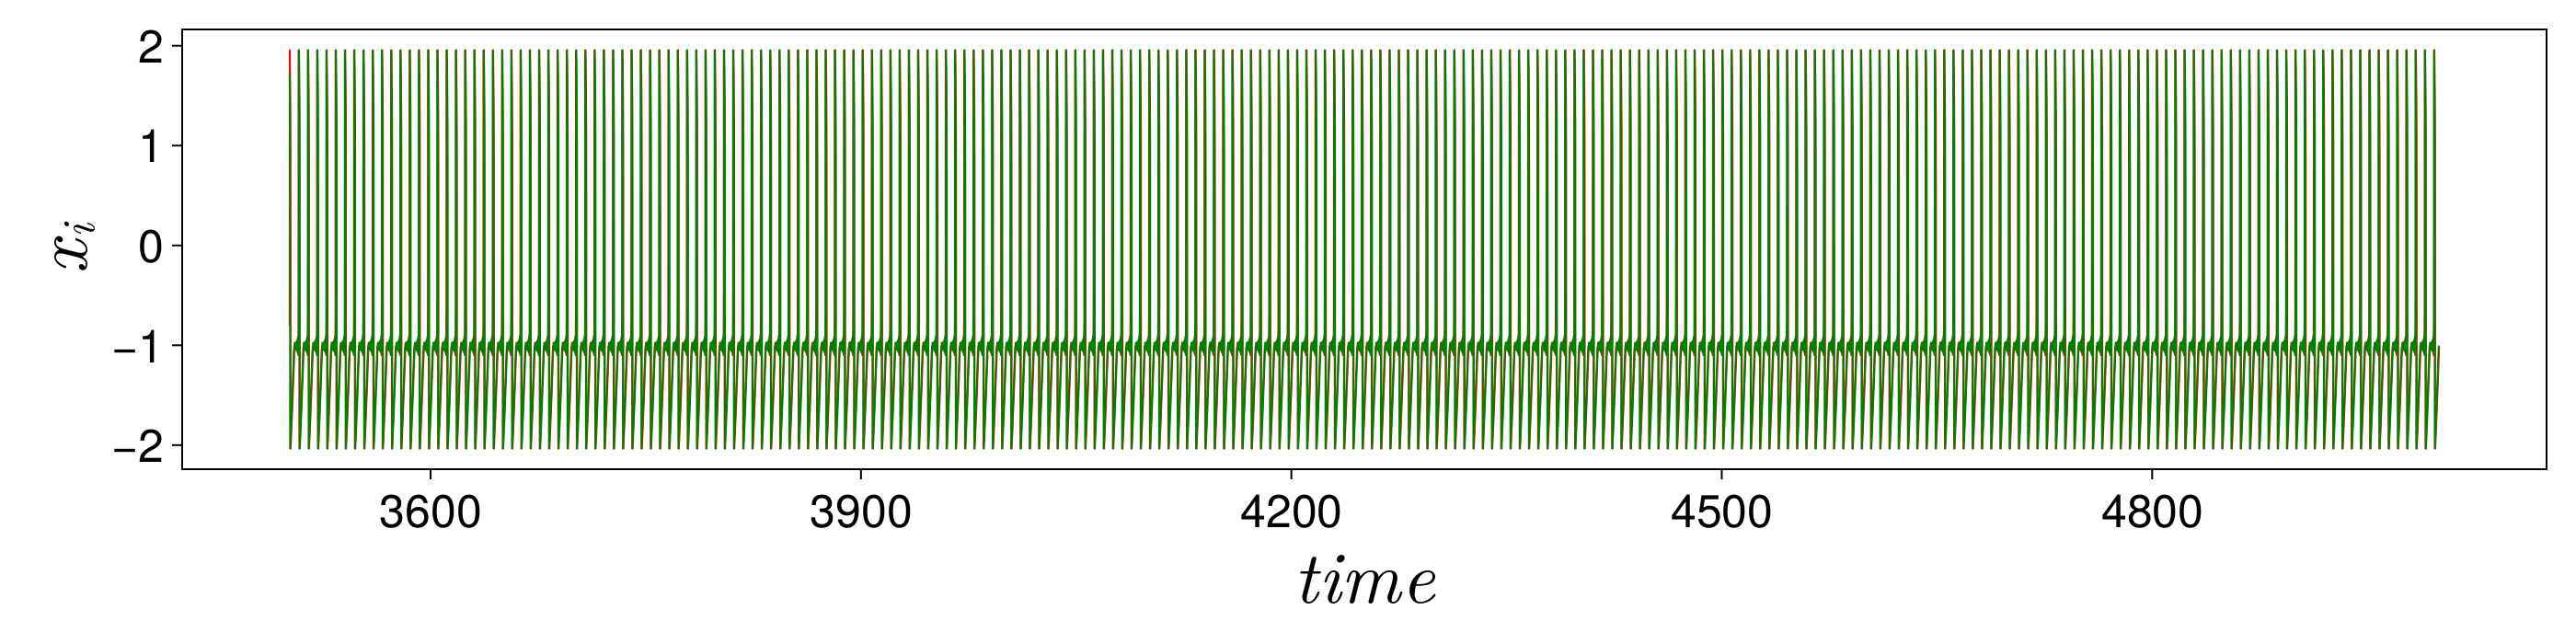

CairoMakie.Screen{IMAGE}


In [131]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

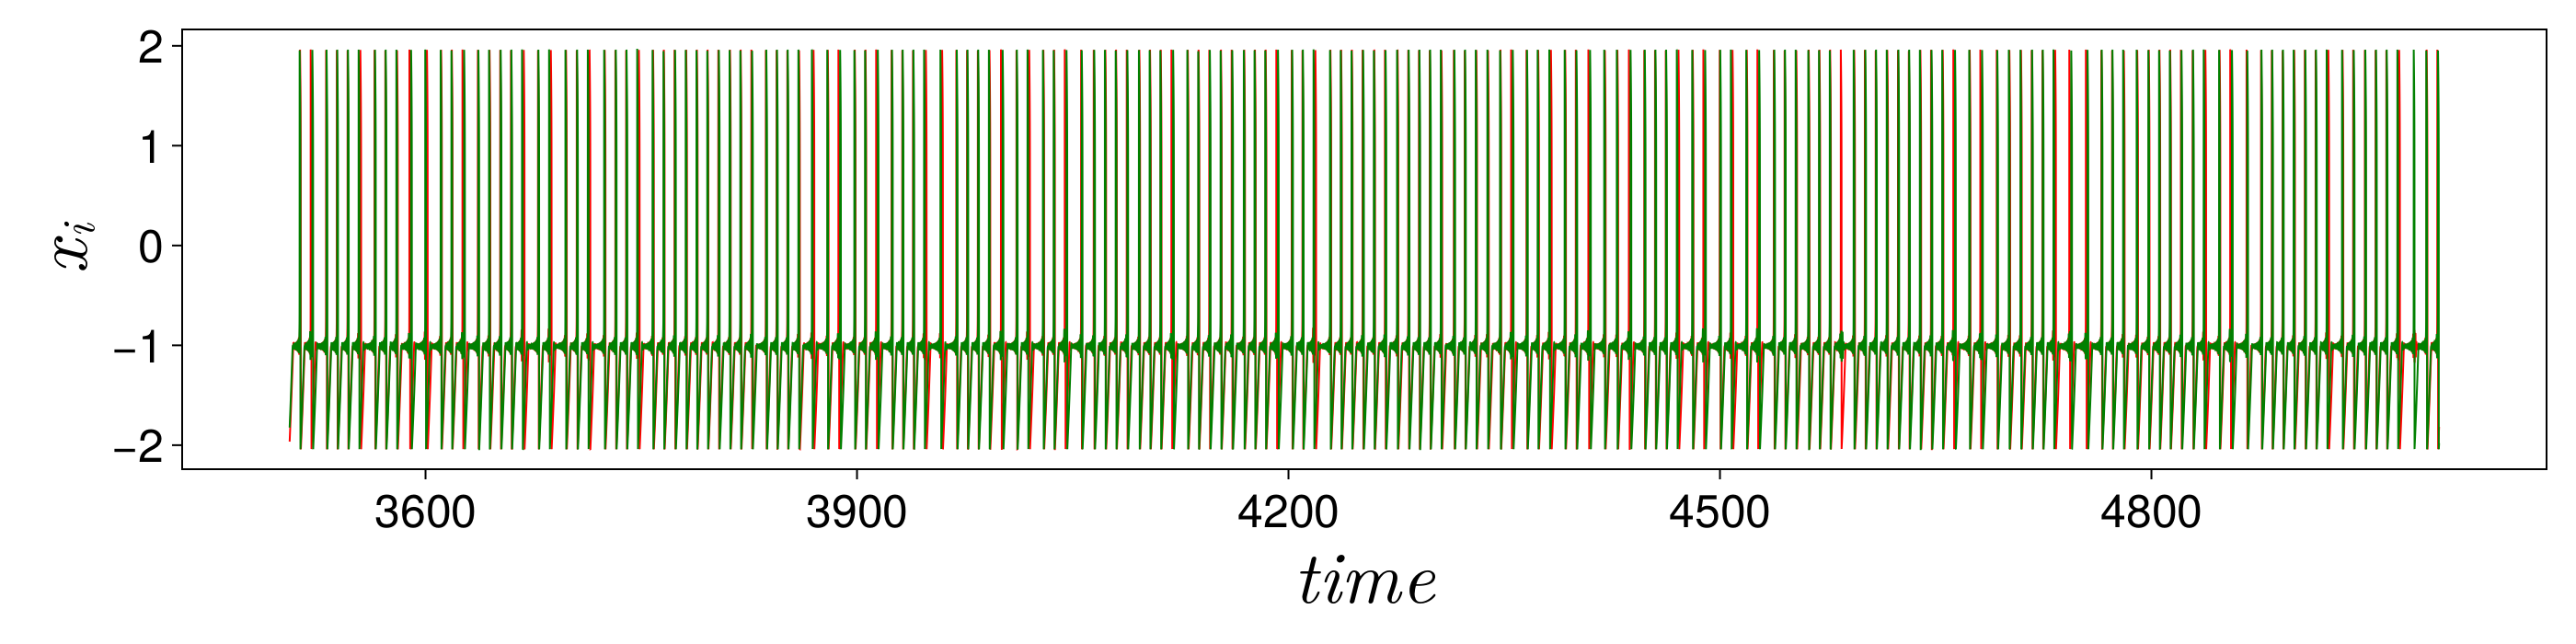

CairoMakie.Screen{IMAGE}


In [105]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

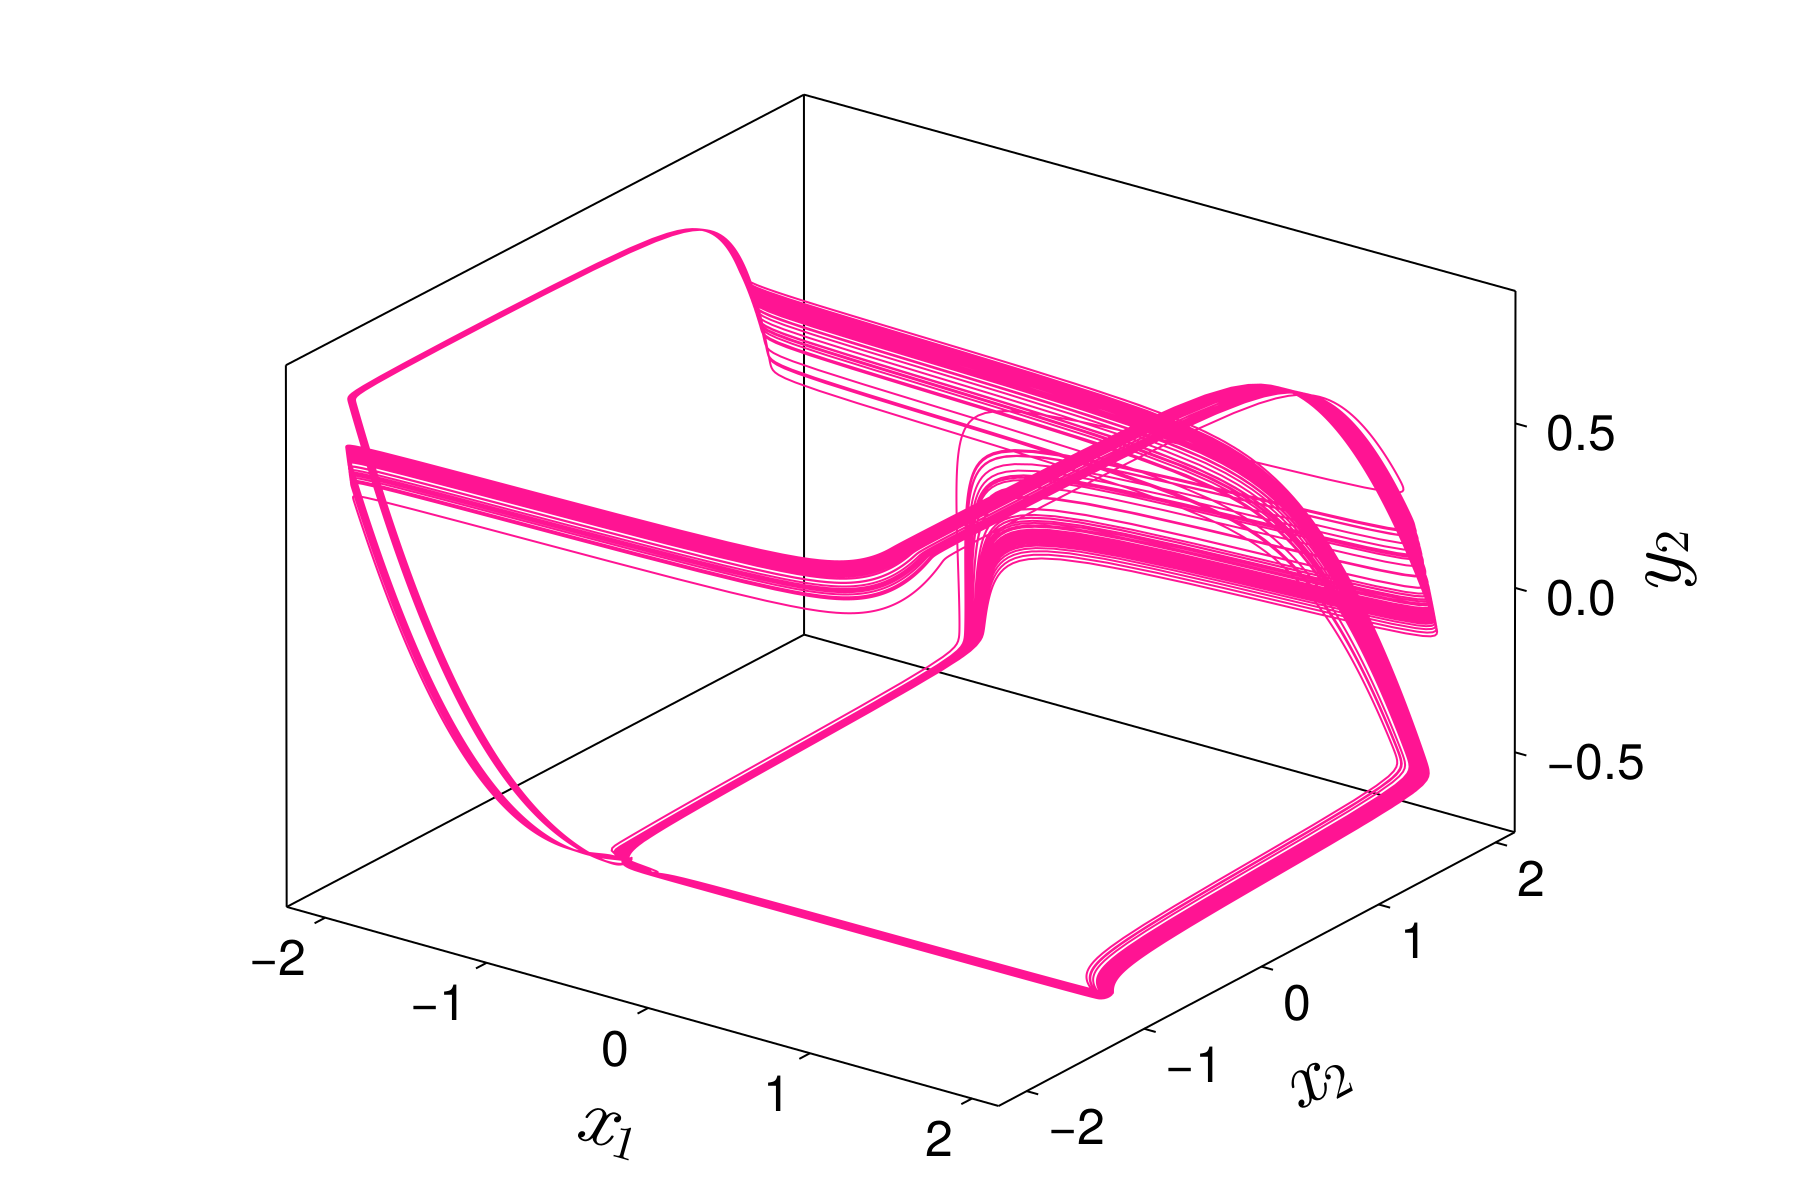

CairoMakie.Screen{IMAGE}


In [208]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)

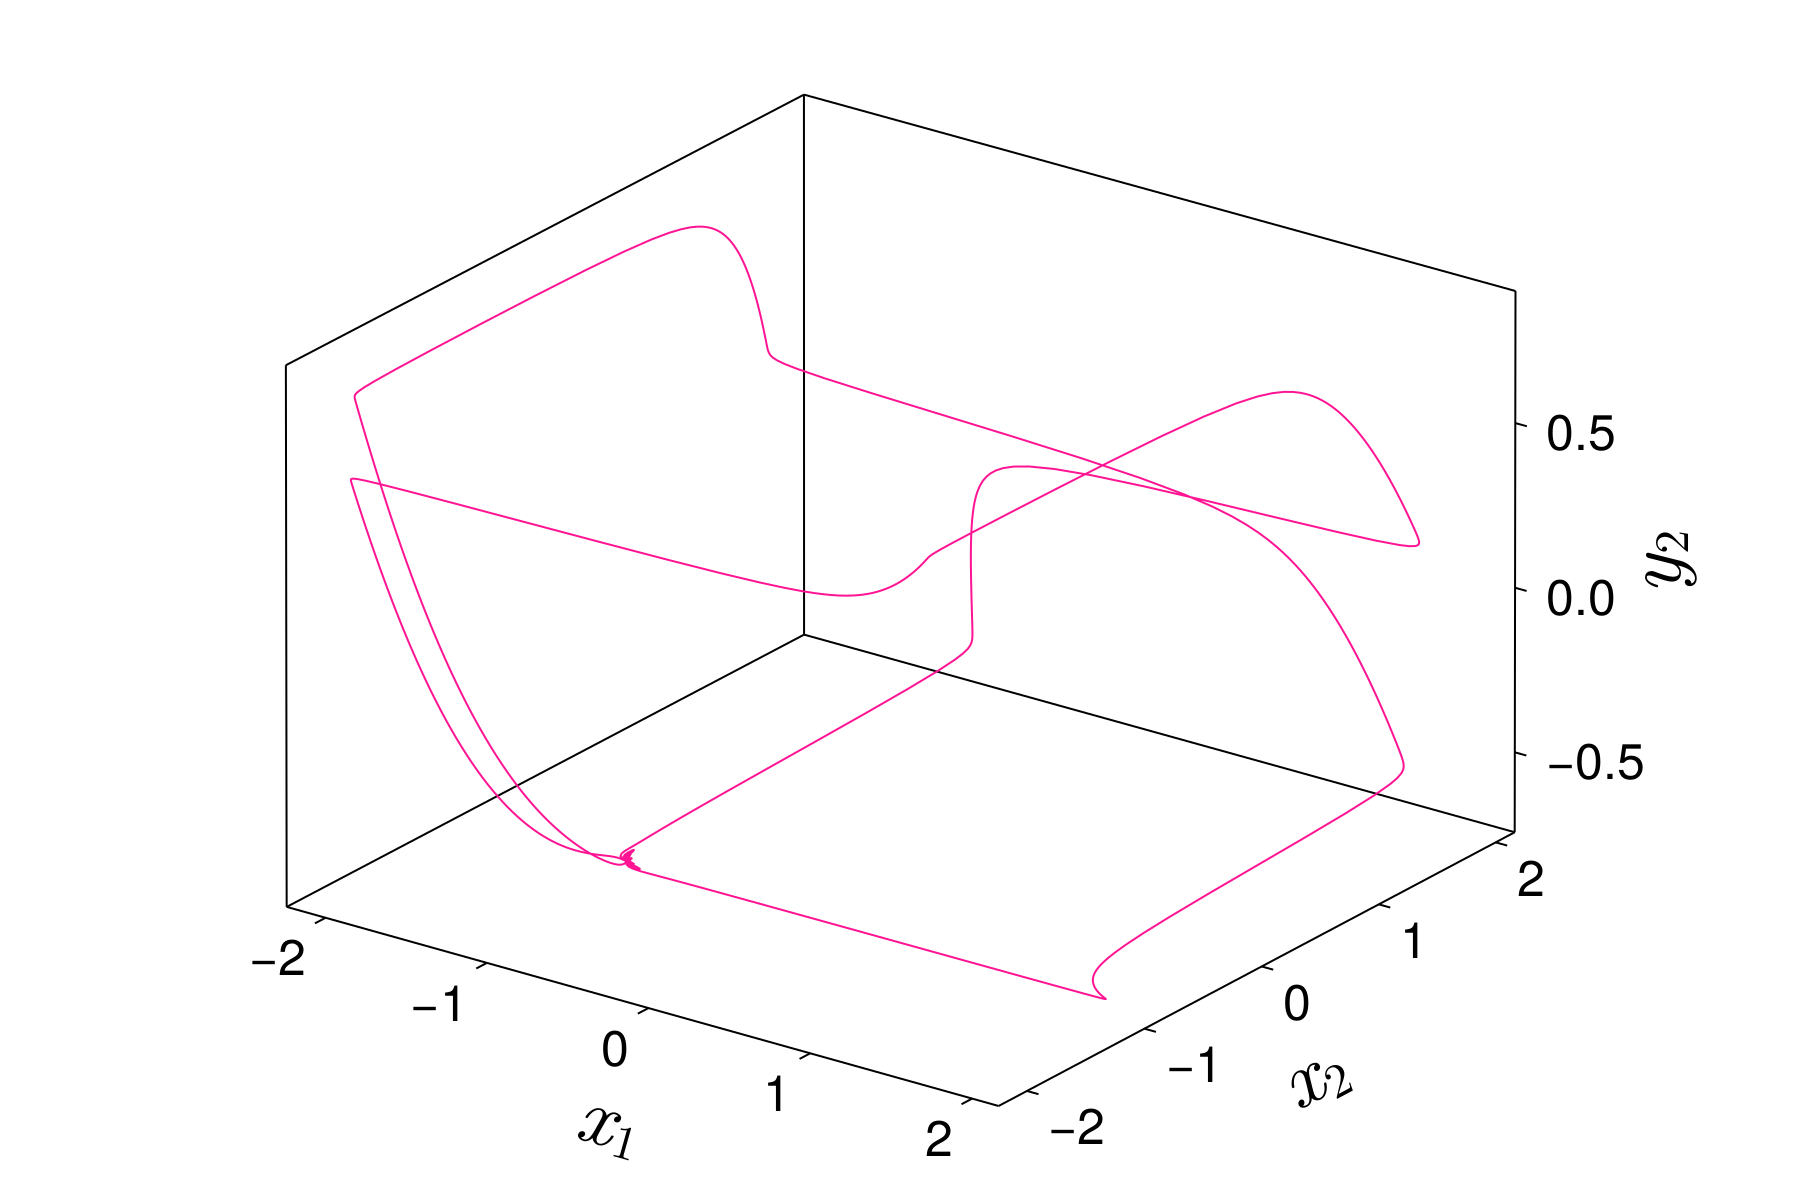

CairoMakie.Screen{IMAGE}


In [132]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)

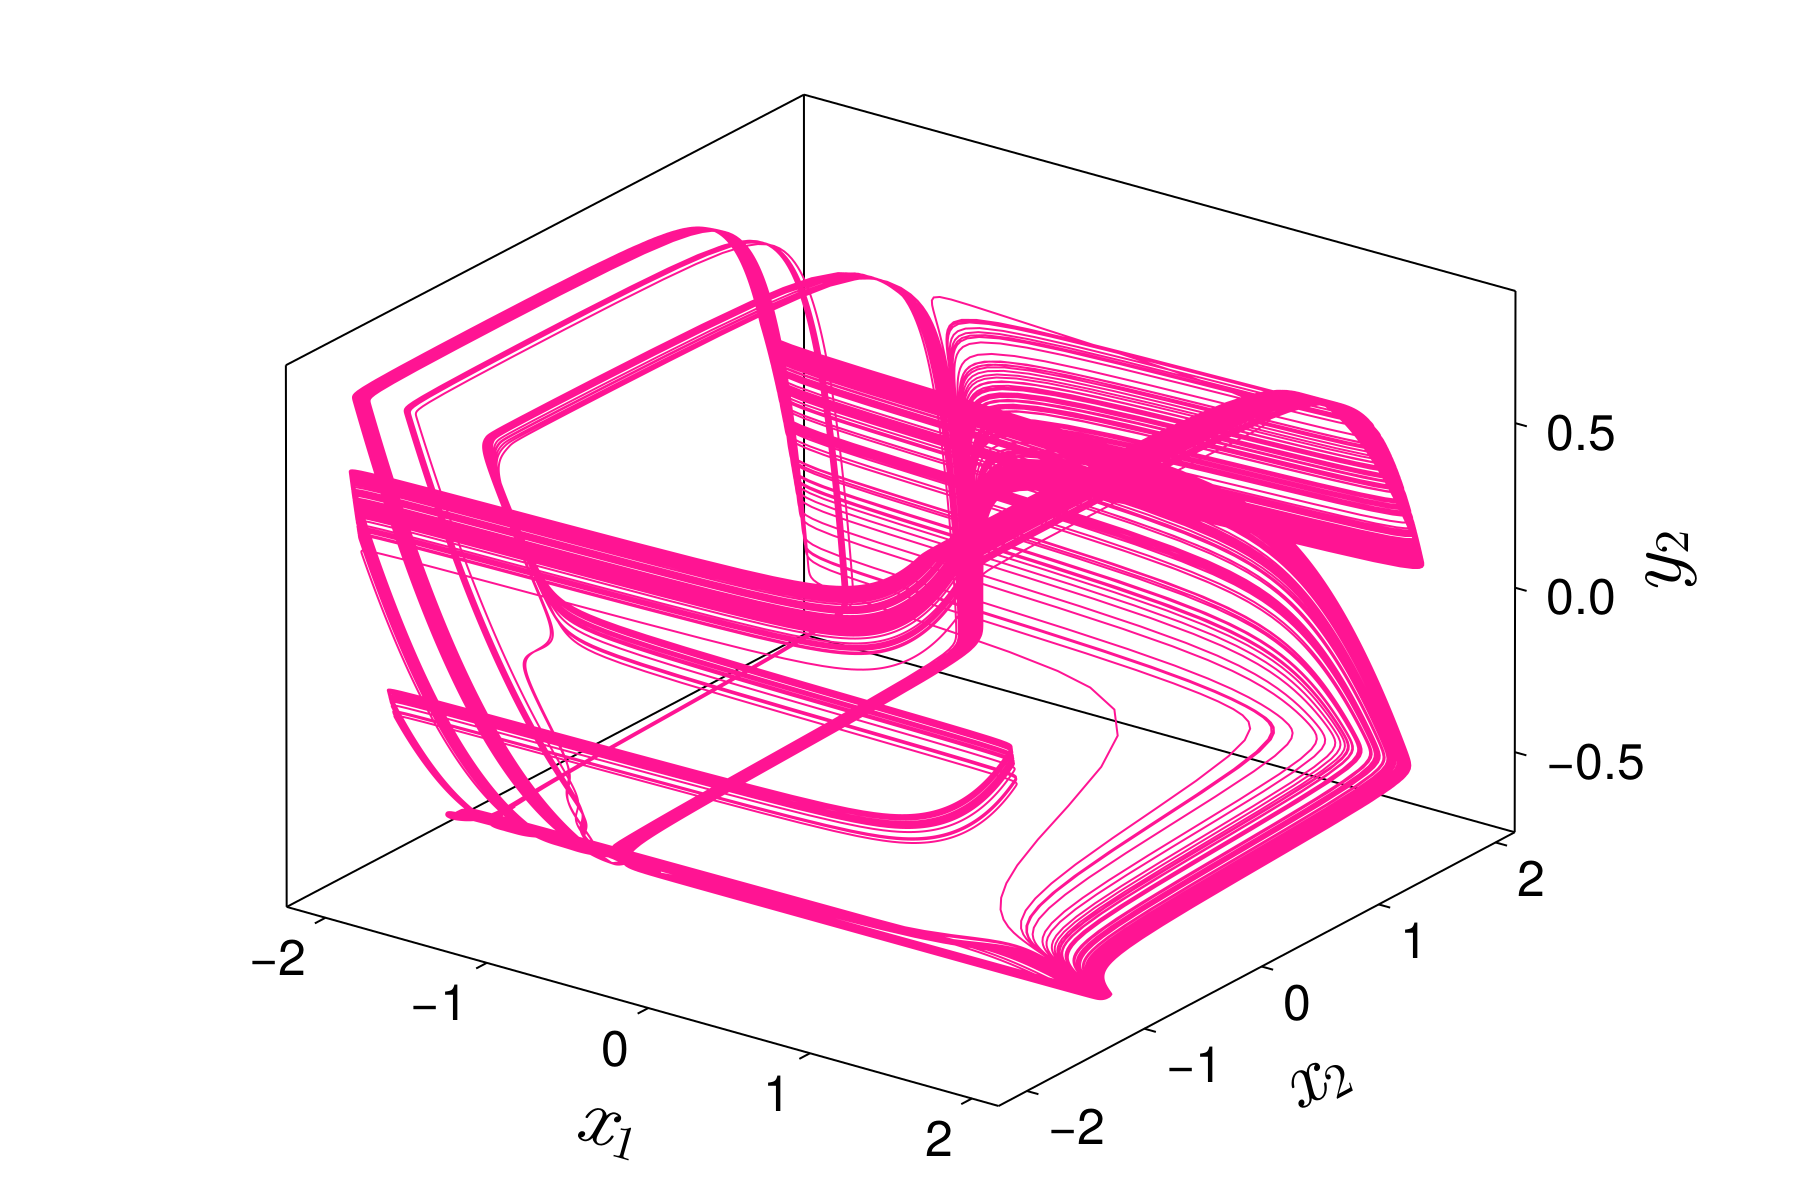

CairoMakie.Screen{IMAGE}


In [104]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)